# Preparing data for transfer learning on ScanNet
I want to perform transfer learning on ScanNet, so that I can use the existing trained network to identify ligand binding sites (LBS). First I just want to try it out, so I will perform a test using the scPDB dataset, which is a dataset containing structures that bind a ligand. To start, I downloaded a `.tsv` containing information for each entry in the dataset.

## Loading the data
Let's begin by loading the data and examining some basic properties.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_table('scPDB_Results.tsv')

In [3]:
data.head()

,PDB_ID,Site_Number,Deposition_Date,Chimeric_entry,Experimental_Method,Chains,ChainPercentageInSite,Uniprot_Name,Uniprot_AC,Uniprot_ID,...,IF_bit_7,IF_bit_8,ClusterID,Cluster_Name,Cavity_Volume,Cavity_Hydrophobicity,Cavity_Polar,Cavity_Dummy,Cavity_Ligand_Recovery,Ligand_Cavity_Recovery
0,10mh,1,1998-08-10,0.0,XRay,A,100.00,Modification methylase HhaI,P05102,MTH1_HAEPH,...,0.0,0.0,NaN,NaN,577.125,53.2164,43.8596,2.9240,0.0,38.5965
1,11bg,2,1999-03-11,0.0,XRay,A//B,82.00//18.00,Seminal ribonuclease//Seminal ribonuclease,P00669//P00669,RNS_BOVIN//RNS_BOVIN,...,0.0,0.0,NaN,NaN,482.625,20.2797,60.1399,19.5804,0.0,30.0699
2,12gs,1,1997-11-19,0.0,XRay,A//B,93.00//7.00,Glutathione S-transferase P//Glutathione S-tra...,P09211//P09211,GSTP1_HUMAN//GSTP1_HUMAN,...,1.0,0.0,NaN,NaN,975.375,34.9481,50.5190,14.5329,0.0,20.0692
3,13gs,1,1997-11-20,0.0,XRay,A,100.00,Glutathione S-transferase P,P09211,GSTP1_HUMAN,...,0.0,0.0,NaN,NaN,857.250,31.8898,55.9055,12.2047,0.0,21.6535
4,17gs,1,1997-12-07,0.0,XRay,A//B,93.00//7.00,Glutathione S-transferase P//Glutathione S-tra...,P09211//P09211,GSTP1_HUMAN//GSTP1_HUMAN,...,1.0,0.0,NaN,NaN,999.000,32.0946,56.7568,11.1486,0.0,21.6216


In [4]:
data.describe()

,Site_Number,Chimeric_entry,Molecular Weight,Polar_Surface_Area,N_HBond_Acceptor,N_HBond_Donor,Rotatable_Bonds,N_Ring,RO5_Violation,ALogP,...,IF_bit_7,IF_bit_8,ClusterID,Cluster_Name,Cavity_Volume,Cavity_Hydrophobicity,Cavity_Polar,Cavity_Dummy,Cavity_Ligand_Recovery,Ligand_Cavity_Recovery
count,16031.000000,15978.000000,16031.000000,16031.000000,16031.000000,16031.000000,16031.000000,16031.000000,16031.000000,16031.000000,...,16030.000000,16030.000000,0.0,0.0,16031.000000,16031.000000,16031.000000,16031.000000,16031.0,16031.000000
mean,1.652299,0.002441,475.797287,204.673841,10.452498,3.494791,7.833261,3.406774,1.123885,-1.979315,...,0.091953,0.160636,NaN,NaN,792.750257,49.058241,41.074593,9.865825,0.0,34.144727
std,1.443334,0.049346,181.011081,122.178620,6.735580,2.106777,4.936321,1.450244,1.123168,4.549208,...,0.339404,0.391226,NaN,NaN,459.324918,10.283369,9.849762,4.590997,0.0,15.198828
min,1.000000,0.000000,140.055000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-32.806000,...,0.000000,0.000000,NaN,NaN,236.250000,18.942700,3.333300,0.000000,0.0,0.917400
25%,1.000000,0.000000,347.457000,99.100000,5.000000,2.000000,4.000000,3.000000,0.000000,-5.890000,...,0.000000,0.000000,NaN,NaN,472.500000,41.966600,35.000000,6.530600,0.0,22.496200
50%,1.000000,0.000000,440.409000,177.900000,8.000000,3.000000,7.000000,3.000000,1.000000,-2.401000,...,0.000000,0.000000,NaN,NaN,675.000000,47.773300,42.004800,9.691600,0.0,33.157900
75%,2.000000,0.000000,579.496000,319.880000,16.000000,5.000000,11.000000,4.000000,2.000000,2.182000,...,0.000000,0.000000,NaN,NaN,958.500000,55.070800,47.973000,12.956600,0.0,45.033100
max,26.000000,1.000000,1498.184000,900.810000,49.000000,21.000000,45.000000,9.000000,4.000000,12.789000,...,3.000000,4.000000,NaN,NaN,2770.875000,93.805300,71.621600,29.069800,0.0,85.714300


In [5]:
data.columns

Index(['PDB_ID', 'Site_Number', 'Deposition_Date', 'Chimeric_entry',
       'Experimental_Method', 'Chains', 'ChainPercentageInSite',
       'Uniprot_Name', 'Uniprot_AC', 'Uniprot_ID', 'Species', 'Reign', 'TaxID',
       'EC_Number', 'Ion', 'Cofactor', 'HET_CODE', 'Formula', 'SMILES',
       'InChI', 'Molecular Weight', 'Polar_Surface_Area', 'N_HBond_Acceptor',
       'N_HBond_Donor', 'Rotatable_Bonds', 'N_Ring', 'RO5_Violation', 'ALogP',
       'Solubility', 'N_Atoms', 'N_Bonds', 'N_PositiveAtom', 'N_NegativeAtom',
       'N_Aromatic', 'Type', 'B_Factor', 'Buried_Surface_Area', 'Water_InSite',
       'Druggability', 'SITE_Size', 'STD_AA', 'NON_STDAA', 'IFP_LENGTH', 'X',
       'Y', 'Z', 'IF_bit_1', 'IF_bit_2', 'IF_bit_3', 'IF_bit_4', 'IF_bit_5',
       'IF_bit_6', 'IF_bit_7', 'IF_bit_8', 'ClusterID', 'Cluster_Name',
       'Cavity_Volume', 'Cavity_Hydrophobicity', 'Cavity_Polar',
       'Cavity_Dummy', 'Cavity_Ligand_Recovery', 'Ligand_Cavity_Recovery'],
      dtype='object')

## Columns in the dataset
- `PDB_ID` The PDB ID for the entry
- `Site_Number` 
- `Deposition_Date` Date that the PDB entry was deposited to the PDB
- `Experimental_Method` Experimental method to determine the structure
- `Uniprot_Name` Name of the uniprot entry associated with the PDB
- `Uniprot_AC` Uniprot accession
- `Uniprot_ID` Uniprot ID

# Some data exploration

In [6]:
data['year'] = data['Deposition_Date'].str[:4]

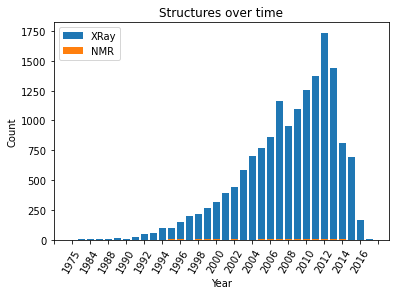

In [7]:
fig, ax = plt.subplots()

ax.bar(data[data['Experimental_Method'] == 'XRay'].groupby('year').count()['PDB_ID'].index, data[data['Experimental_Method'] == 'XRay'].groupby('year').count()['PDB_ID'], label='XRay')
ax.bar(data[data['Experimental_Method'] == 'NMR'].groupby('year').count()['PDB_ID'].index, data[data['Experimental_Method'] == 'NMR'].groupby('year').count()['PDB_ID'], label='NMR')
plt.legend()

ax.set_title('Structures over time')
ax.set_xlabel('Year')
ax.set_ylabel('Count')

ax.tick_params(axis='x', labelrotation = 60)
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(start, end, 2))

Text(0.5, 0.98, 'Distributions')

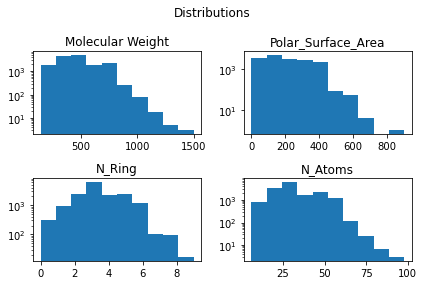

In [8]:
cols = iter(['Molecular Weight','Polar_Surface_Area','N_Ring','N_Atoms'])
fix, ax = plt.subplots(2,2,tight_layout=True)

for i in [0,1]:
    for j in [0,1]:
        col = next(cols)
        ax[i,j].hist(data[col])
        ax[i,j].set_title(col)
        ax[i,j].set_yscale('log')

plt.suptitle('Distributions')

<AxesSubplot:>

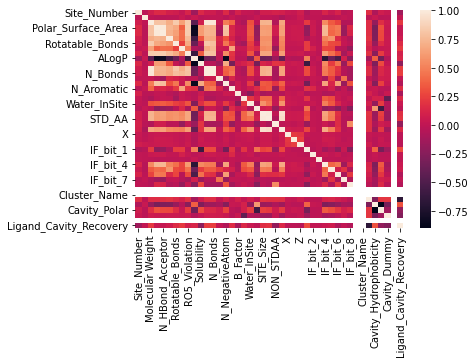

In [9]:
import seaborn as sns
corr = data.corr()
sns.heatmap(corr)

## Dealing with multiple chains
Right now the dataset contains entries with multiple chains. This is fine, but some of these might have different uniprot AC's. I want to remove those who do not have multiple uniprot AC's, because currently I do not know how ScanNet deals with those. This means I only get homodimers, homotrimers and so on.

In [10]:
num_chains = data['Chains'].str.split('//').apply(len)
num_chains.value_counts()

1     11132
2      4270
3       259
4       255
6        74
8        25
9         6
5         3
12        3
10        2
15        1
14        1
Name: Chains, dtype: int64

In [11]:
data['Uniprot_AC'].str.split('//').apply(set).apply(len).value_counts()

1    15918
2      110
3        3
Name: Uniprot_AC, dtype: int64

In [12]:
data['num_uniprot'] = data['Uniprot_AC'].str.split('//').apply(set).apply(len)
data['num_chains'] = data['Chains'].str.split('//').apply(len)
data.groupby(['num_chains','num_uniprot']).size()

num_chains  num_uniprot
1           1              11132
2           1               4270
3           1                259
4           1                184
            2                 71
5           1                  3
6           1                 51
            2                 23
8           1                 11
            2                 14
9           1                  4
            3                  2
10          1                  1
            2                  1
12          1                  2
            2                  1
14          1                  1
15          3                  1
dtype: int64

<AxesSubplot:xlabel='num_chains'>

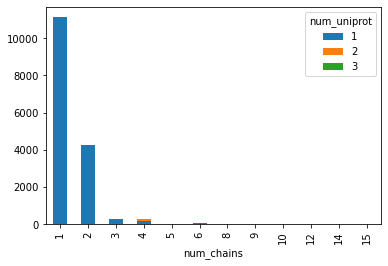

In [13]:
data.groupby(['num_chains','num_uniprot']).size().unstack().plot(kind='bar', stacked=True)

Seems like there is only a few different uniprot AC's. I will simply just drop these.

In [55]:
to_remove = data[data['num_uniprot'] > 1].index
data = data.drop(to_remove, axis=0)

And now we only keep the first uniprot AC in each entry

In [56]:
data['Uniprot_AC'] = data['Uniprot_AC'].str[:6]

# Dealing with the duplicates
Unfortunately I have a lot of duplicates with the Uniprot AC's. I need to get rid of those to avoid feeding in the same data. I will use a naive method where I use the first entry of each uniprot AC and PDB ID combination.

In [57]:
print('Are there duplicates?')
if data['Uniprot_AC'].str[:6].duplicated().any():
    print(f'Yes, there are duplicates')
    print(data['Uniprot_AC'][data['Uniprot_AC'].str[:6].duplicated()].value_counts())
else:
    print('No, there no duplicates')

Are there duplicates?
Yes, there are duplicates
P24941    273
P29476    192
P56817    190
Q16539    169
P00918    136
         ... 
O34994      1
P00730      1
Q5SID2      1
Q9GN60      1
P21453      1
Name: Uniprot_AC, Length: 2149, dtype: int64


<AxesSubplot:>

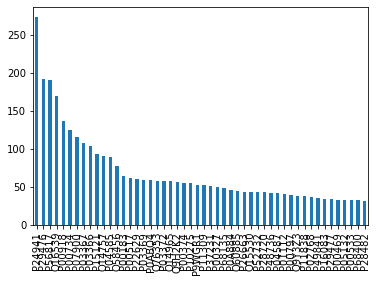

In [58]:
data['Uniprot_AC'][data['Uniprot_AC'].duplicated()] \
    .value_counts() \
    .head(50)\
    .plot(kind='bar')

In [59]:
data.drop_duplicates(subset=['Uniprot_AC'],keep='first')

,PDB_ID,Site_Number,Deposition_Date,Chimeric_entry,Experimental_Method,Chains,ChainPercentageInSite,Uniprot_Name,Uniprot_AC,Uniprot_ID,...,Cluster_Name,Cavity_Volume,Cavity_Hydrophobicity,Cavity_Polar,Cavity_Dummy,Cavity_Ligand_Recovery,Ligand_Cavity_Recovery,year,num_uniprot,num_chains
0,10mh,1,1998-08-10,0.0,XRay,A,100.00,Modification methylase HhaI,P05102,MTH1_HAEPH,...,NaN,577.125,53.2164,43.8596,2.9240,0.0,38.5965,1998,1,1
1,11bg,2,1999-03-11,0.0,XRay,A//B,82.00//18.00,Seminal ribonuclease//Seminal ribonuclease,P00669,RNS_BOVIN//RNS_BOVIN,...,NaN,482.625,20.2797,60.1399,19.5804,0.0,30.0699,1999,1,2
2,12gs,1,1997-11-19,0.0,XRay,A//B,93.00//7.00,Glutathione S-transferase P//Glutathione S-tra...,P09211,GSTP1_HUMAN//GSTP1_HUMAN,...,NaN,975.375,34.9481,50.5190,14.5329,0.0,20.0692,1997,1,2
5,1a26,1,1998-01-16,0.0,XRay,A,100.00,Poly [ADP-ribose] polymerase 1,P26446,PARP1_CHICK,...,NaN,837.000,43.9516,45.1613,10.8871,0.0,4.0323,1998,1,1
6,1a27,1,1998-01-16,0.0,XRay,A,100.00,Estradiol 17-beta-dehydrogenase 1,P14061,DHB1_HUMAN,...,NaN,769.500,63.1579,28.5088,8.3333,0.0,22.3684,1998,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15998,4mqt,2,2013-09-16,NaN,XRay,A,100.00,Muscarinic acetylcholine receptor M2,P08172,ACM2_HUMAN,...,NaN,735.750,54.1284,39.9083,5.9633,0.0,29.8165,2013,1,1
16005,4ej4,1,2012-04-06,NaN,XRay,A,100.00,Delta-type opioid receptor,P32300,OPRD_MOUSE,...,NaN,864.000,58.2031,31.2500,10.5469,0.0,25.7812,2012,1,1
16012,3vw7,1,2012-08-07,NaN,XRay,A,100.00,Proteinase-activated receptor 1,P25116,PAR1_HUMAN,...,NaN,432.000,51.5625,41.4063,7.0313,0.0,50.7812,2012,1,1
16016,3pbl,2,2010-10-20,NaN,XRay,B,100.00,D(3) dopamine receptor,P35462,DRD3_HUMAN,...,NaN,1782.000,45.0758,36.1742,18.7500,0.0,11.9318,2010,1,1


# Obtaining the binding site residues
Now that we have the Uniprot AC's and their PDB structure, we need to identify which residues bind the ligand. We can obtain annotations from the uniprotKB and parse them in a boolean format, where `1` indicates a binding residue.

We can obtain the features by using the Uniprot REST API. I specify that I want only binding sites. The results are given in `JSON` format.

In [60]:
import requests
import json
uniprot_id = 'P00669'
r = requests.get(f'https://www.ebi.ac.uk/proteins/api/features/{uniprot_id}?categories=DOMAINS_AND_SITES&types=BINDING')
r.json()

{'accession': 'P00669',
 'entryName': 'RNS_BOVIN',
 'sequence': 'MALKSLVVLPLLVLVLLLVRVQPSLGKESAAAKFERQHMDSGNSPSSSSNYCNLMMCCRKMTQGKCKPVNTFVHESLADVKAVCSQKKVTCKNGQTNCYQSKSTMRITDCRETGSSKYPNCAYKTTQVEKHIIVACGGKPSVPVHFDASV',
 'sequenceChecksum': 'F7A05C930FB83A83',
 'taxid': 9913,
 'features': [{'type': 'BINDING',
   'category': 'DOMAINS_AND_SITES',
   'description': '',
   'begin': '33',
   'end': '33',
   'molecule': '',
   'ligand': {'name': 'substrate'}},
  {'type': 'BINDING',
   'category': 'DOMAINS_AND_SITES',
   'description': '',
   'begin': '36',
   'end': '36',
   'molecule': '',
   'ligand': {'name': 'substrate'}},
  {'type': 'BINDING',
   'category': 'DOMAINS_AND_SITES',
   'description': '',
   'begin': '67',
   'end': '71',
   'molecule': '',
   'ligand': {'name': 'substrate'}},
  {'type': 'BINDING',
   'category': 'DOMAINS_AND_SITES',
   'description': '',
   'begin': '92',
   'end': '92',
   'molecule': '',
   'ligand': {'name': 'substrate'}},
  {'type': 'BINDING',
   'categor

We can loop over the JSON as a python dictionary. Here I obtain the index of all the residues that have a binding site annotation

In [61]:
index = []
for d in r.json()['features']:
    print(d['begin'],d['end'])

    # Conver to int since everything is a string
    begin = int(d['begin'])
    end = int(d['end'])
    
    if begin == end:
        index.append(begin)
    else: 
        assert end > begin
        # Make a list and append
        index = index + list(range(begin, end+1))
index

33 33
36 36
67 71
92 92
111 111


[33, 36, 67, 68, 69, 70, 71, 92, 111]

Now I need to get string of `0` and replace the indices.

In [62]:
label = list('0' * len(r.json()['sequence']))

for i in index:
    label[i-1] = '1' # Remember that LBS indices are 1-indexed
    
''.join(label)

'000000000000000000000000000000001001000000000000000000000000000000111110000000000000000000010000000000000000001000000000000000000000000000000000000000'

And now we put everything together.

In [65]:
indices = []
labels = []
sequences = []

for uniprot_id in data['Uniprot_AC']:
    r = requests.get(f'https://www.ebi.ac.uk/proteins/api/features/{uniprot_id}?categories=DOMAINS_AND_SITES&types=BINDING')
    if r.status_code == 200:

        seq = r.json()['sequence']
        # print(uniprot_id, len(seq))
        
        
        index = []
        for d in r.json()['features']:
    #         print(d['begin'],d['end'])
            begin = int(d['begin'])
            end = int(d['end'])

            if begin == end:
                index.append(begin)
            else:
                assert end > begin
                index = index + list(range(begin, end+1))
                
        # if index == []:
        #     print(uniprot_id, 'Warning: No LBS')
        # print(index)
        
        label = list('0' * len(r.json()['sequence']))

        for i in index:
            label[i-1] = '1' # Remember that LBS indices are 1-indexed

        label = ''.join(label)
    
    else:
        seq = np.nan
        index = np.NaN
        label = np.nan

    sequences.append(seq)
    indices.append(index)
    labels.append(label)

In [66]:
data['sequence'] = sequences

## Getting it straight from scPDB
While working on this, I discovered that scPDB has their own binary encoding for the binding site. I downloaded the associated `IFP` file from my query.

In [67]:
f = open('IFP.txt', 'r')
for i,line in enumerate(f.readlines()):
    print(line)
    if i == 15:
        break

10mh_1

|A   D16|A   L17|A   F18|A   A19|A   G20|A   L21|A   G22|A   G23|A   F24|A   R25|A   N39|A   E40|A   W41|A   D42|A   A45|A   E58|A   G59|A   D60|A   I61|A   T62|A   A77|A   G78|A   F79|A   P80|A   C81|A  L100|A  E119|A  Y285|A  Q301|A  N304|A  S305|A  V306|A  I308|A  L311|AHOH331|AHOH340

000000000000000010000000000000000000000000010000000000000001000000000000000000000000000000001000000100000000000000000000000000000000000000001000000100000000000000000000000000000000000010000000000000000000000000000000000000000000000010000000000100000000000000000000000000000000000000001000

11bg_2

|A   M13|A   D14|A   S15|A   S18|A   P19|A   S21|A   S23|A   N24|A   Y25|A   N27|A   L28|B   M29|A   C31|B   C32|B   R33|A   T36|B   L51|A   P93|A   N94|A   C95|A   A96|A   Y97|AHOH206

0000000000000000000000000000000000000000000000000000000010000000000000001000000010000000000000000000000000000000000100000000000000000000000000000000000000000000000000000000000000000000

12gs_1

|A    Y7|A    F8|A    P9

Seems like every structure has three lines associated with it:
1. PDB code
2. Residue number and interaction type
3. Binary representation of the sequence

So I need to link each third line using each first line.

In [68]:
ifp_data = {'PDB_ID': [],
            'res_string': [],
            'Site_Number':[]}

f = open('IFP.txt', 'r')
for i,line in enumerate(f.readlines()):
    if (i+1) % 3 == 1: # Every first line
        ifp_data['PDB_ID'].append(line[:4])
        ifp_data['Site_Number'].append(line[5:6])
    elif (i+1) % 3 == 0: # Every third line
        ifp_data['res_string'].append(line)

ifp_data_df = pd.DataFrame(ifp_data)

In [69]:
ifp_data_df = ifp_data_df.astype({'PDB_ID':str,'res_string':str, 'Site_Number': int})
ifp_data_df.dtypes

PDB_ID         object
res_string     object
Site_Number     int32
dtype: object

In [74]:
print('Before merging:', data.shape)
data_merged = pd.merge(data,ifp_data_df,how='left',on=['PDB_ID','Site_Number'])
print('After merging:', data_merged.shape)
data_merged = data_merged.dropna(subset=['res_string','sequence'])
print('After dropping NaNs:' , data_merged.shape)

Before merging: (15918, 66)
After merging: (15918, 67)
After dropping NaNs: (15675, 67)


Now that we have merged the data, I came across a different problem. Some PDB_IDs have multiple sites. For now, I'll just stick to using a single site.

In [75]:
data_merged = data_merged[data_merged['Site_Number'] == 1]
data_merged = data_merged[data_merged['num_chains'] == 1]

(-50.0, 50.0)

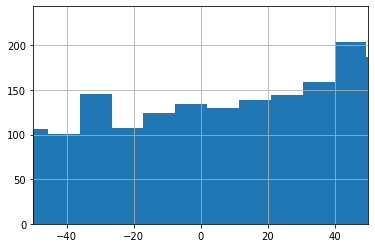

In [86]:
len_seq = data_merged['sequence'].apply(len)
len_mask = data_merged['res_string'].apply(len)

(len_seq - len_mask).hist(bins=1000)


Unfortunately, the length of the sequences and the residue masks differ, and also by a lot for most instances. I didnt want to do this, but I may have to download and parse individual PDB structures instead. 

In [87]:
data_merged.to_csv('preprocessed_data.csv',index=False)

In [18]:
data_merged = pd.read_csv('preprocessed_data.csv')

In [91]:
prody.fetchPDB(data_merged['PDB_ID'].to_list(), compressed=False,folder='pdb')

@> Connecting wwPDB FTP server RCSB PDB (USA).
@> 1bnn downloaded (pdb\1bnn.pdb)
@> 1bnq downloaded (pdb\1bnq.pdb)
@> 1bnt downloaded (pdb\1bnt.pdb)
@> 1bnu downloaded (pdb\1bnu.pdb)
@> 1bnv downloaded (pdb\1bnv.pdb)
@> 1bnw downloaded (pdb\1bnw.pdb)
@> 1bob downloaded (pdb\1bob.pdb)
@> 1bof downloaded (pdb\1bof.pdb)
@> 1boo downloaded (pdb\1boo.pdb)
@> 1boz downloaded (pdb\1boz.pdb)
@> 1bp0 downloaded (pdb\1bp0.pdb)
@> 1bp6 downloaded (pdb\1bp6.pdb)
@> 1bpj downloaded (pdb\1bpj.pdb)
@> 1bq6 downloaded (pdb\1bq6.pdb)
@> 1bqo downloaded (pdb\1bqo.pdb)
@> 1brp downloaded (pdb\1brp.pdb)
@> 1bsv downloaded (pdb\1bsv.pdb)
@> 1bu5 downloaded (pdb\1bu5.pdb)
@> 1bux downloaded (pdb\1bux.pdb)
@> 1bwc downloaded (pdb\1bwc.pdb)
@> 1bwk downloaded (pdb\1bwk.pdb)
@> 1bwl downloaded (pdb\1bwl.pdb)
@> 1bws downloaded (pdb\1bws.pdb)
@> 1bx0 downloaded (pdb\1bx0.pdb)
@> 1bx1 downloaded (pdb\1bx1.pdb)
@> 1bx6 downloaded (pdb\1bx6.pdb)
@> 1bx9 downloaded (pdb\1bx9.pdb)
@> 1bxd downloaded (pdb\1bxd.pdb)
@

KeyboardInterrupt: 

In [ ]:
protein_residues = ' '.join(['CYS', 'ASP', 'SER', 'GLN', 'LYS', 'ILE', 
                            'PRO', 'THR', 'PHE', 'ASN', 'GLY', 'HIS', 
                            'LEU', 'ARG', 'TRP', 'ALA', 'VAL', 'GLU', 
                            'TYR', 'MET'])
protein_residues = 'resname ' + protein_residues

def get_res_dict(nums,names):
    return dict(zip(nums,names))

def get_single_res(x: str):
    d3to1 = {'CYS': 'C', 'ASP': 'D', 'SER': 'S', 'GLN': 'Q', 'LYS': 'K',
            'ILE': 'I', 'PRO': 'P', 'THR': 'T', 'PHE': 'F', 'ASN': 'N', 
            'GLY': 'G', 'HIS': 'H', 'LEU': 'L', 'ARG': 'R', 'TRP': 'W', 
            'ALA': 'A', 'VAL':'V', 'GLU': 'E', 'TYR': 'Y', 'MET': 'M','HOH': 'HOH'}
    return d3to1[x]

resids_dict = {PDB_ID: {} for PDB_ID in data_merged['PDB_ID']}
sequence_dict = {PDB_ID: {} for PDB_ID in data_merged['PDB_ID']}

for pdb_id, chain in data_merged[['PDB_ID','Chains']].head(100).to_numpy():
    
    prody.fetchPDB(pdb_id, compressed=False,folder='pdb')
    parsed_pdb = prody.parsePDB(f'pdb/{pdb_id}.pdb',).select(protein_residues)[chain] # we ignore waters and ligands
    
    # Get AA one-letter codes
    resnames = list(map(get_single_res,parsed_pdb.getResnames()))
    
    # Parse as dict to get rid of duplicate values
    parsed_dict = get_res_dict(parsed_pdb.getResnums(),resnames)

    # Store
    sequence_dict[pdb_id][chain] = ''.join(parsed_dict.values())
    resids_dict[pdb_id][chain] = parsed_dict.keys()

@> PDB file is found in working directory (pdb\10mh.pdb).
@> 3254 atoms and 1 coordinate set(s) were parsed in 0.05s.
@> PDB file is found in working directory (pdb\13gs.pdb).
@> 3591 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> PDB file is found in working directory (pdb\1a26.pdb).
@> 2886 atoms and 1 coordinate set(s) were parsed in 0.05s.
@> PDB file is found in working directory (pdb\1a27.pdb).
@> 2406 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> PDB file is found in working directory (pdb\1a2b.pdb).
@> 1488 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> PDB file is found in working directory (pdb\1a2n.pdb).
@> 3449 atoms and 1 coordinate set(s) were parsed in 0.08s.
@> PDB file is found in working directory (pdb\1a42.pdb).
@> 2118 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> PDB file is found in working directory (pdb\1a4r.pdb).
@> 3087 atoms and 1 coordinate set(s) were parsed in 0.05s.
@> PDB file is found in working directory (pdb\1a4w.pdb)